## Datasets
- Occupations by State and Likelihood of Automation: https://data.world/wnedds/occupations-by-state-and-likelihood-of-automation

- SOC categories: "scraped" from https://www.bls.gov/soc/2018/home.htm

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Function tidy-izes the data
def organize(df, year):
    df = df[7:]
    df = df.rename(columns={df.columns[0]: 'Occupation', df.columns[1]: 'Total{}'.format(year)})
    df.dropna(inplace=True)
    df.reset_index(inplace=True)
    df = df[['Occupation', 'Total{}'.format(year)]]

    
    return df

In [3]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
          'Georgia', 'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
          'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
          'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
          'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
          'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [4]:
# Creates and cleans dataframes for the year
employment2016 = organize(pd.read_excel('blsdata/cpsaat11b2016.xlsx'), 2016)
employment2017 = organize(pd.read_excel('blsdata/cpsaat11b2017.xlsx'), 2017)
employment2018 = organize(pd.read_excel('blsdata/cpsaat11b2018.xlsx'), 2018)
employment2019 = organize(pd.read_excel('blsdata/cpsaat11b2019.xlsx'), 2019)

employment = pd.merge(pd.merge(employment2016, employment2017), pd.merge(employment2018, employment2019))

In [5]:
data = pd.read_csv('datasets/raw_state_automation_data.csv', encoding='cp1252')
soc = pd.read_csv('datasets/SOC.csv')
employment2016 = pd.read_csv('datasets/cpsaat11b.csv')

In [6]:
data

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,53-7072,Pump Operators; Except Wellhead Pumpers,0.900,0,0,0,0,1130,190,0,...,0,130,3780,0,0,0,0,110,80,0
698,53-7073,Wellhead Pumpers,0.840,0,0,0,180,220,600,0,...,0,0,4130,90,0,0,0,550,0,550
699,53-7081,Refuse and Recyclable Material Collectors,0.930,2070,210,1980,1530,13850,1710,910,...,430,2230,7760,710,480,3430,1890,970,2140,230
700,53-7111,Mine Shuttle Car Operators,0.370,50,0,0,0,0,70,0,...,0,0,0,0,0,0,0,510,0,0


In [7]:
soc.rename(columns={'  Occupation':'Occupation'}, inplace=True)

In [8]:
soc.head()

,Code_Prefix,Occupation
0,11-0000,Management Occupations
1,11-1000,Top Executives
2,Nov-00,"Advertising, Marketing, Promotions, Public Re..."
3,Nov-00,Operations Specialities Managers
4,Nov-00,Other Management Occupations


In [9]:
data.sort_values(by=['SOC'], inplace=True)

In [10]:
# Average probability of automation: 53%
mean_probability = data.Probability.mean()

In [11]:
# Average probability of automation for management positions: 16%
mean_management_probability = data[data.SOC.str.startswith('11')].Probability.mean()

In [12]:
# Adds a 'total_employees' column for each occupation
total = []

for i in range(len(data)):
    total.append(data.loc[i, [state for state in states]].values.sum())

data = data.assign(total_employees = total)

In [13]:
# Converts total_employees column to and integer value (otherwise would be XYZ.0 float value)
data.total_employees = data.total_employees.astype(int)

[[1.         0.08169575]
 [0.08169575 1.        ]]


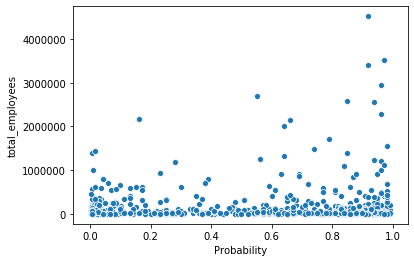

In [14]:
# There is almost no correlation between number of employees and probability of automation
sns.scatterplot(data.Probability, data.total_employees)
print(np.corrcoef(data.Probability, data.total_employees))

In [15]:
# Statistics for probability of 10th percentile of employees
data[data.total_employees >= np.percentile(data.total_employees, 10)].Probability.describe()

count    631.000000
mean       0.534153
std        0.367298
min        0.002800
25%        0.105000
50%        0.640000
75%        0.890000
max        0.990000
Name: Probability, dtype: float64

In [16]:
# Create a dictionary of SOCs
soc_dict = {key:value for (key,value) in zip(soc.Code_Prefix, soc.Occupation)}

In [17]:
# Add base-level occupation category for each occupation
prefix = []
for index in range(len(data)):
    prefix.append(data.SOC[index][:3])

prefix = [substring + '0000' for substring in prefix]
occupation_category = [soc_dict[item] for item in prefix]
occupation_category = [item[1:] for item in occupation_category]

data = data.assign(Category = occupation_category)

In [18]:
# Probability stats for each base-level occupational category
data.groupby('Category').Probability.describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Architecture and Engineering Occupations,34.0,0.279382,0.318716,0.0100,0.022000,0.1200,0.4875,0.96
"Arts, Design, Entertainment, Sports, and Media Occupations",36.0,0.238014,0.302714,0.0040,0.022750,0.0780,0.3725,0.98
Building and Grounds Cleaning and Maintenance Occupations,8.0,0.776250,0.156565,0.5700,0.660000,0.7300,0.9425,0.97
Business and Financial Operations Occupations,30.0,0.552100,0.378403,0.0120,0.230000,0.5750,0.9400,0.99
Community and Social Service Occupations,13.0,0.043262,0.070746,0.0031,0.008100,0.0140,0.0330,0.25
Computer and Mathematical Operations,15.0,0.221033,0.281492,0.0065,0.032500,0.1300,0.2200,0.99
Construction and Extraction Occupations,56.0,0.732857,0.191944,0.1500,0.627500,0.8100,0.8700,0.96
Educational Instruction and Library Occupations,22.0,0.225095,0.297054,0.0042,0.007725,0.0810,0.3575,0.99
"Farming, Fishing, and Forestry Occupations",11.0,0.793636,0.169957,0.4100,0.765000,0.8300,0.9050,0.97


In [19]:
data.Category.value_counts()

Production Occupations                                        103
Construction and Extraction Occupations                        56
Office and Administrative Support Occupations                  52
Installation, Maintenance, and Repair Occupations              50
Transportation and Material Moving Occupations                 48
Healthcare Practitioners and Technical Occupations             44
Life, Physical, and Social Science Occupations                 42
Arts, Design, Entertainment, Sports, and Media Occupations     36
Architecture and Engineering Occupations                       34
Management Occupations                                         31
Business and Financial Operations Occupations                  30
Personal Care and Service Occupations                          30
Educational Instruction and Library Occupations                22
Sales and Related Occupations                                  20
Protective Service Occupations                                 19
Food Prepa

In [20]:
# Do some voodoo dictionary stuff to get probabilities and number of jobs in occupation
category_vals = dict(data.Category.value_counts())
prob_vals = dict(data.groupby('Category').Probability.mean())
sorted_cat = sorted(set(category_vals.items()))
sorted_prob = sorted(set(prob_vals.items()))
nums_cat = [num for (cat,num) in sorted_cat]
nums_prob = [prob for (cat,prob) in sorted_prob]

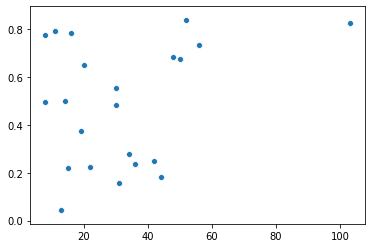

In [21]:
# Plots number of jobs in occupation vs likelihood of automation
sns.scatterplot(nums_cat, nums_prob)

In [22]:
# Dataframes for the top/bottom 5% probability-wise
data_95 = data[data.Probability >= .95]
data_05 = data[data.Probability <= .05]

In [23]:
data_05.head()

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total_employees,Category
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,5890,3650,280,6320,5910,980,3740,160,220430,Management Occupations
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,1210,380,40,240,640,40,200,0,27860,Management Occupations
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,9570,2320,380,3840,5830,260,2980,30,204620,Management Occupations
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,22310,3360,480,5360,7390,600,5730,180,364070,Management Occupations
5,11-2031,Public Relations and Fundraising Managers,0.015,400,150,1240,300,7010,960,980,...,3680,380,210,1250,2100,130,1010,0,59590,Management Occupations


In [24]:
data_95.head()

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,total_employees,Category
12,11-3111,Compensation and Benefits Managers,0.96,90,0,300,150,1590,190,250,...,690,170,0,360,380,0,340,0,14980,Management Occupations
35,13-1031,Claims Adjusters; Examiners; and Investigators,0.98,3730,290,0,1450,32540,3340,4980,...,19650,1910,240,5110,5730,1340,6230,150,264450,Business and Financial Operations Occupations
36,13-1032,Insurance Appraisers; Auto Damage,0.98,0,0,460,0,0,90,210,...,1840,70,0,540,270,0,70,0,10790,Business and Financial Operations Occupations
39,13-1074,Farm Labor Contractors,0.97,0,0,0,0,350,0,0,...,0,0,0,0,0,0,0,0,350,Business and Financial Operations Occupations
51,13-2041,Credit Analysts,0.98,490,0,1130,520,7910,1300,1240,...,7940,830,100,1840,900,100,1850,40,67530,Business and Financial Operations Occupations


In [25]:
data_95.SOC.values

array(['11-3111', '13-1031', '13-1032', '13-1074', '13-2041', '13-2053',
       '13-2072', '13-2082', '15-2091', '17-3031', '19-4011', '23-2093',
       '25-4031', '27-2023', '27-4013', '33-9031', '35-2014', '35-3022',
       '35-9031', '37-3011', '37-3012', '39-3011', '39-3021', '39-3031',
       '39-5092', '41-2011', '41-2021', '41-2022', '41-9012', '41-9021',
       '41-9041', '43-2011', '43-2021', '43-3011', '43-3021', '43-3031',
       '43-3051', '43-3061', '43-3071', '43-4011', '43-4041', '43-4071',
       '43-4121', '43-4141', '43-4151', '43-4171', '43-5011', '43-5032',
       '43-5051', '43-5071', '43-5111', '43-6012', '43-6014', '43-9021',
       '43-9041', '43-9061', '45-2021', '45-4023', '47-2073', '47-5051',
       '49-9061', '49-9064', '49-9093', '51-2022', '51-2023', '51-2092',
       '51-2093', '51-4033', '51-4035', '51-4072', '51-5111', '51-5113',
       '51-6042', '51-6051', '51-6061', '51-6062', '51-6064', '51-7031',
       '51-7042', '51-8011', '51-9021', '51-9022', 

In [26]:
# Top 95% looks to contain a lot of 51- prefix, lets see what it is
soc[soc.Code_Prefix == '51-0000']

,Code_Prefix,Occupation
99,51-0000,Production Occupations


In [27]:
data_05.SOC.values

array(['11-1011', '11-2011', '11-2021', '11-2022', '11-2031', '11-3021',
       '11-3051', '11-3061', '11-3121', '11-3131', '11-9013', '11-9031',
       '11-9032', '11-9033', '11-9041', '11-9081', '11-9111', '11-9121',
       '11-9151', '11-9161', '13-1081', '13-1121', '13-1151', '13-2071',
       '15-1111', '15-1121', '15-1132', '15-1141', '15-1142', '15-2021',
       '15-2031', '17-1011', '17-1012', '17-2011', '17-2031', '17-2041',
       '17-2051', '17-2072', '17-2081', '17-2111', '17-2112', '17-2121',
       '17-2131', '17-2141', '17-2199', '17-3026', '19-1013', '19-1021',
       '19-1022', '19-1029', '19-1031', '19-1032', '19-1042', '19-2011',
       '19-2032', '19-2041', '19-2043', '19-3031', '19-3032', '19-3039',
       '19-3091', '19-3094', '19-3099', '19-4092', '21-1011', '21-1012',
       '21-1013', '21-1014', '21-1015', '21-1021', '21-1022', '21-1023',
       '21-1091', '21-2011', '21-2021', '23-1011', '25-1000', '25-2011',
       '25-2021', '25-2031', '25-2032', '25-2053', 

In [28]:
# Bottom 5% contains a lot of 11-, 19-, 29- prefixs
soc[soc.Code_Prefix == '11-0000']

,Code_Prefix,Occupation
0,11-0000,Management Occupations


In [29]:
soc[soc.Code_Prefix == '19-0000']

,Code_Prefix,Occupation
15,19-0000,"Life, Physical, and Social Science Occupations"


In [30]:
soc[soc.Code_Prefix == '29-0000']

,Code_Prefix,Occupation
38,29-0000,Healthcare Practitioners and Technical Occupa...


In [31]:
data_trim = data[['SOC', 'Occupation', 'Probability']]

In [32]:
data_trim = pd.merge(data_trim, employment)

In [33]:
data_trim.head()

,SOC,Occupation,Probability,Total2016,Total2017,Total2018,Total2019
0,13-1081,Logisticians,0.012,115,112,128,154
1,15-2011,Actuaries,0.210,14,29,33,33
2,15-2021,Mathematicians,0.047,4,3,3,3
3,15-2041,Statisticians,0.220,74,87,90,101
4,19-3011,Economists,0.430,26,28,36,35


In [34]:
data_trim['percent_change'] = (data_trim.Total2019 - data_trim.Total2016)/data_trim.Total2016
data_trim.head()

,SOC,Occupation,Probability,Total2016,Total2017,Total2018,Total2019,percent_change
0,13-1081,Logisticians,0.012,115,112,128,154,0.33913
1,15-2011,Actuaries,0.210,14,29,33,33,1.35714
2,15-2021,Mathematicians,0.047,4,3,3,3,-0.25
3,15-2041,Statisticians,0.220,74,87,90,101,0.364865
4,19-3011,Economists,0.430,26,28,36,35,0.346154


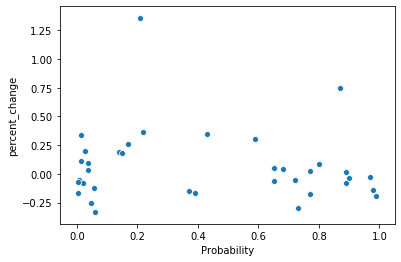

In [35]:
sns.scatterplot(data_trim.Probability, data_trim.percent_change)